In [1]:
import urllib
from urllib import request
from bs4 import BeautifulSoup
import re
import json
import requests
from selenium import webdriver
import random

In [2]:
# 这里填写无忧代理IP提供的API订单号（请到用户中心获取）
# 获取IP的API接口
apiUrl = "http://api.ip.data5u.com/api/get.shtml?order=34145db9b4b4500e4ba4bf3b7865e38a&num=100&carrier=0&protocol=0&an1=1&an2=2&an3=3&sp1=1&sp2=2&sp3=3&sort=1&system=1&distinct=0&rettype=1&seprator=%0D%0A"

# 获取IP列表
res = request.urlopen(apiUrl).read().decode('utf-8').strip('\n')
print('ok')
#按照\n分割获取到的IP
ips = res.split("\n")
# 随机选择一个IP
proxyip = random.choice(ips)
    
proxy = {}
proxy['http'] = proxyip

    
# 使用代理IP请求目标网址
proxy_support = request.ProxyHandler(proxy)
opener = request.build_opener(proxy_support)
request.install_opener(opener)  

  
    
my_headers=[
        "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/22.0.1207.1 Safari/537.1",
        "Mozilla/5.0 (X11; CrOS i686 2268.111.0) AppleWebKit/536.11 (KHTML, like Gecko) Chrome/20.0.1132.57 Safari/536.11",
        "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/536.6 (KHTML, like Gecko) Chrome/20.0.1092.0 Safari/536.6",
        "Mozilla/5.0 (Windows NT 6.2) AppleWebKit/536.6 (KHTML, like Gecko) Chrome/20.0.1090.0 Safari/536.6",
        "Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/19.77.34.5 Safari/537.1",
        "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.87 Safari/537.36"
        

]
    
random_header=random.choice(my_headers)

print(random_header)
print(proxyip)

# 进入浏览器设置
options = webdriver.ChromeOptions()
random_header=random.choice(random_header)

# 更换头部
options.add_argument('user-agent=random_header')
options.add_argument('Host="www.dianping.com"')
options.add_argument('Connection="keep-alive"')
options.add_argument('Accept-Language="zh-CN,zh;q=0.8"')
options.add_argument('--proxy-server=%s' % proxyip)
chrome_options = webdriver.ChromeOptions()
browser = webdriver.Chrome(chrome_options=options)

# 要抓取的目标网站地址
url = "https://www.dianping.com/shop/48054178"
try:
    browser.get(url)
except HTTPError as e:
    print(e)


ok
Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.1 (KHTML, like Gecko) Chrome/19.77.34.5 Safari/537.1
186.103.239.190:80


In [3]:
html = browser.page_source

In [4]:
soup = BeautifulSoup(html, 'html.parser')
soup

TypeError: object of type 'NoneType' has no len()

In [5]:
# 提取价格

In [6]:
info = soup.find_all(id='avgPriceTitle')

In [7]:
pattern = re.compile('[0-9]{1,}')
result = pattern.findall(str(info))
ave_money = result[0]+u'元'
print(result[0]+u'元')

117元


In [8]:
address = soup.find_all(class_='breadcrumb', attrs='href')
address

[<div class="breadcrumb">
 <a href="http://www.dianping.com/shanghai/food" itemprop="url">
             上海餐厅
         </a>
         &gt;
         <a href="http://www.dianping.com/search/category/1/10/r838" itemprop="url">
             打浦桥
         </a>
         &gt;
         <a href="http://www.dianping.com/search/category/1/10/g102r838" itemprop="url">
             川菜
         </a>
         &gt;
         <a href="http://www.dianping.com/search/category/1/10/g4467r838" itemprop="url">
             川菜/家常菜
         </a>
         &gt;
     <span>宋记香辣蟹(日月光中心广场店)</span>
 </div>]

In [9]:
str(address)
results = re.findall('itemprop="url">\n            (.*?)\n        </a>',str(address))
shop_name = re.findall('<span>(.*?)</span>', str(address))

In [10]:
city = results[0][0:-2]

In [11]:
cbd = results[1]
food_type = results[2]
shop_id = re.findall('[0-9]{1,}', url)[0]

In [12]:
brief_info = soup.find_all(class_="brief-info", attrs='id')
# print(type(str(brief_info)))
soup2 = BeautifulSoup(str(brief_info), 'html.parser')

In [13]:
soup2

[<div class="brief-info">
<span class="mid-rank-stars mid-str45" title="准五星商户"></span>
<span class="item" id="reviewCount">21896条评论</span>
<span class="item" id="avgPriceTitle">人均：117元</span>
<span id="comment_score">
	    |
	        <span class="item">口味：8.4</span>
|
	        <span class="item">环境：8.5</span>
|
	        <span class="item">服务：8.5</span>
</span>
<a class="icon score-btn J-score"></a>
</div>]

In [14]:
content = soup2.find_all(id='reviewCount')
plcount = re.findall('id="reviewCount">(.*)</span>', str(content))
plcount = plcount[0][0:-3]

In [15]:
rank = soup2.span
rank = re.findall('title="(.*?)"', str(rank))[0]

In [16]:
str(content)

'[<span class="item" id="reviewCount">21896条评论</span>]'

In [17]:
results = re.findall('<span class="item">(.*?)</span>', str(soup2))

In [18]:
results

['口味：8.4', '环境：8.5', '服务：8.5']

In [19]:
kw = results[0]
kw = kw[3:]

In [20]:
hj = results[1]
hj = hj[3:]

In [21]:
fw = results[2]
fw = fw[3:]

In [22]:
s_shop_num = soup.find_all(class_="branch J-branch")
if s_shop_num:
    s_shop_num = re.findall('>(.*?)<', str(s_shop_num))
    s_shop_num = s_shop_num[0]
    sub_shop_num = str(s_shop_num)[2:-3]
else:
    sub_shop_num = 0

In [23]:
tel = soup.find_all(itemprop='tel')
tel = re.findall('>(.*?)<', str(tel))[0]

In [24]:
add = soup.find_all(itemprop="street-address")[0]
add = re.findall('title="(.*?)">', str(add))[0]
add

'徐家汇路618号日月光中心广场徐家汇区4层'

In [25]:
soup.find_all(class_="promosearch-wrapper")

[<div class="promosearch-wrapper">
 <p class="expand-info J-service nug-shop-ab-special_a">
 <span class="info-name">特色：</span>
 <a class="tag tag-tuan-b J-service-tuan" href="http://t.dianping.com/deal/22279668" target="_blank"></a>
 <a class="tag tag-ding-b" href="javascript:;" id="reservation-icon"></a>
 <a class="tag tag-wai-b" href="http://waimai.dianping.com/dish/16789967" target="_blank"></a>
 </p>
 </div>]

In [26]:
info_sp = re.findall('a class="tag tag-(.*?)-b', str(soup))

In [27]:
len(info_sp)

3

In [28]:
sp_info = ""
for ele in info_sp:
    if ele == "tuan":
        sp_info = sp_info + u"团、"
    elif ele == "wai":
        sp_info = sp_info + u"外、"
    elif ele == "cu":
        sp_info = sp_info + u"促、"
    elif ele == "ding":
        sp_info = sp_info + u"订、"
sp_info = sp_info[0:-1]

In [29]:
sp_info

'团、订、外'

In [30]:
t_info = soup.find_all(class_="info info-indent")
str(t_info)

'[<p class="info info-indent">\n<span class="info-name">营业时间：</span>\n<span class="item">\n                    周一至周日\n11:00-15:00\n17:00-21:30\n                </span>\n<a class="item-gray" href="/shop/16789967/edit" target="_blank">\n            修改\n        </a>\n</p>, <p class="info info-indent">\n<span class="info-name">餐厅简介：</span>曾经一度很辉煌，但“现在和以前是不能比了”。其实香辣蟹依然“挺赞”的，烧得“很入味”，而且里面的笋干和年糕也“蛮好吃”。另外香辣虾也不错，只是配料“和香辣蟹差不多”。生意还可以。\n        </p>]'

In [31]:
soup3 = BeautifulSoup(str(t_info), "html.parser")

In [32]:
t_info = soup3.find_all(class_='item')[0].text

In [33]:
time = t_info.strip().replace('\n', '')

In [34]:
t = re.findall('<span class="item">(.*?)</span>', str(t_info))
t

[]

<!DOCTYPE html>
<html class="" xmlns="http://www.w3.org/1999/xhtml"><head><script async="" src="https://s0.meituan.net/bs/js/?f=mta-js:mta.min.js"></script><script async="" src="http://nugget.dianping.com/jsonp/loggingconfig?pageId=12&amp;_nr_force=1502260697398&amp;callback=NR._JSONPCallback._1502260697380"></script>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<script>(function(n){var e;e="//catdot.dianping.com/broker-service/api/js",n.onerror=function(n,o,r){var i=encodeURIComponent,t=+new Date();(new Image).src=e+"?error="+i(n)+"&amp;file="+i(o)+"&amp;line="+i(r)+"&amp;timestamp="+t}})(window);</script>
<title>宋记香辣蟹(日月光中心广场店)电话,地址,营业时间(图)-上海美食-大众点评网</title>
<script>
    document.documentElement.className = location.hash ? 'J_H' : '';

    !(function (win, doc, ns) {
        var cacheFunName = '_MeiTuanALogObject';
        win[cacheFunName] = ns;
        if (!win[ns]) {
            var _LX = function () {
                _LX.q.push(arguments);
     
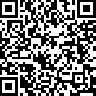
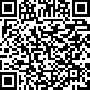
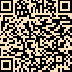
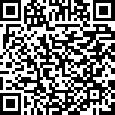

In [35]:
soup

In [36]:
comment_good = soup.find_all(class_="good J-summary")
elements = re.findall('1">(.*?)</a></span>', str(comment_good))
comment = str()

In [37]:
for ele in elements:
    comment = comment + str(ele)

In [38]:
comment

'回头客(1385)干净卫生(269)有表演(3)海鲜棒(33)'

In [39]:
comment_bad = soup.find_all(class_="bad J-summary")
elements = re.findall('0">(.*?)</a></span>', str(comment_bad))

In [40]:
for ele in elements:
    comment = comment + str(ele)
comment

'回头客(1385)干净卫生(269)有表演(3)海鲜棒(33)朋友聚餐(217)工作餐(42)下午茶(40)请客(40)家庭聚餐(28)深夜食堂(28)'

In [41]:
try:
    brief_info = soup.find_all("p", class_="info info-indent")
    soup4 = BeautifulSoup(str(brief_info), "html.parser")
    namelist = soup4.find_all("p")
    brief_info = namelist[1].get_text().strip()[5:]
except:
    brief_info = u"无"

In [42]:
brief_info

'曾经一度很辉煌，但“现在和以前是不能比了”。其实香辣蟹依然“挺赞”的，烧得“很入味”，而且里面的笋干和年糕也“蛮好吃”。另外香辣虾也不错，只是配料“和香辣蟹差不多”。生意还可以。'

In [43]:
food_list = soup.find_all("p", class_="recommend-name")
# print(type(food_list))
for ele in food_list:
    recommend_food = ele.get_text().replace(' ', '')

In [44]:
recommend_food

'香辣大黑蟹(1991)香辣蟹(1137)香辣牛蛙(719)香辣年糕(516)宋记爬爬虾(323)藕片(217)莴笋条(168)干锅牛蛙(165)双椒牛百叶(152)香辣爬爬虾(145)隆顺榕酸梅汤(129)牛百叶(125)椒盐基围虾(120)金桔柠檬茶(76)凉拌金针菇(73)干锅肥肠(69)魔芋丝(62)去骨鸭掌(62)香辣乌江鱼(60)担担面(55)红薯条(51)笋丁(49)豆腐皮(46)午餐肉(40)'

In [45]:
tuan = []
cu = []

In [46]:
item_b = soup.find_all('div',class_='item big')
for ele in item_b:
    info = ele.get_text()
    if u'团' in info:
        tuan.append(info)
    if u'促' in info:
        cu.append(info)

In [47]:
item_s = soup.find_all('a', class_="item small ")
for ele in item_s:
    info = ele.get_text()
    if u'团' in info:
        tuan.append(info)
    if u'促' in info:
        cu.append(info)

In [48]:
item_sj = soup.find_all('a', class_="item small J_short-promo")
for ele in item_sj:
    info = ele.get_text()
    if u'团' in info:
        tuan.append(info)
    if u'促' in info:
        cu.append(info)

In [49]:
tuan_info = str()

for i, ele in enumerate(tuan):
    ele = ele.split()
    ele[1] = u'现价:' + ele[1]
    ele[2] = u'原价:' + ele[2]
    tuan_info = tuan_info + str(i+1) + '、'
    for e in ele:
        tuan_info = tuan_info + str(e) + ' '
    tuan_info = tuan_info

In [50]:
cu_info = str()

for i, ele in enumerate(cu):
    ele = ele.split()
    cu_info = cu_info + str(i+1) + '、'
    for e in ele:
        cu_info = cu_info + str(e) + ' '
    cu_info = cu_info

In [51]:
tuan_info

'1、工作日午市代金券1张 现价:¥91.90 原价:¥100.00 团 已售20457 2、午市虾蟹辉映2人套餐1份 现价:¥168.00 原价:¥223.00 团 已售2428 3、团 现价:¥328.00 原价:¥419.00 工作日午市3-4人套餐1份 4、团 现价:¥138.00 原价:¥190.00 工作日午市牛蛙2人套餐1份 '

In [52]:
cu_info

''

In [53]:
print("url:", url)
print("城市:", city)
print("商圈:", cbd)
print("食物种类:", food_type)
print("店名:", shop_name[0])
print("店铺id:", shop_id)
print("人均:", ave_money)
print("评论数:", plcount)
print("星级:", rank)
print("口味:" ,kw)
print("环境:", hj)
print("服务:", fw)
print("分店数:", sub_shop_num)
print("电话:", tel)
print("地址:", add)
print("特色服务:", sp_info)
print("营业时间:", time)
print("大家认为:", comment)
print("餐厅简介:", brief_info)
print("推荐菜:", recommend_food)
print("促销信息:", cu_info)
print("团购信息:", tuan_info)




url: https://www.dianping.com/shop/16789967
城市: 上海
商圈: 打浦桥
食物种类: 川菜
店名: 宋记香辣蟹(日月光中心广场店)
店铺id: 16789967
人均: 117元
评论数: 21896
星级: 准五星商户
口味: 8.4
环境: 8.5
服务: 8.5
分店数: 8
电话: 021-64172698
地址: 徐家汇路618号日月光中心广场徐家汇区4层
特色服务: 团、订、外
营业时间: 周一至周日11:00-15:0017:00-21:30
大家认为: 回头客(1385)干净卫生(269)有表演(3)海鲜棒(33)朋友聚餐(217)工作餐(42)下午茶(40)请客(40)家庭聚餐(28)深夜食堂(28)
餐厅简介: 曾经一度很辉煌，但“现在和以前是不能比了”。其实香辣蟹依然“挺赞”的，烧得“很入味”，而且里面的笋干和年糕也“蛮好吃”。另外香辣虾也不错，只是配料“和香辣蟹差不多”。生意还可以。
推荐菜: 香辣大黑蟹(1991)香辣蟹(1137)香辣牛蛙(719)香辣年糕(516)宋记爬爬虾(323)藕片(217)莴笋条(168)干锅牛蛙(165)双椒牛百叶(152)香辣爬爬虾(145)隆顺榕酸梅汤(129)牛百叶(125)椒盐基围虾(120)金桔柠檬茶(76)凉拌金针菇(73)干锅肥肠(69)魔芋丝(62)去骨鸭掌(62)香辣乌江鱼(60)担担面(55)红薯条(51)笋丁(49)豆腐皮(46)午餐肉(40)
促销信息: 
团购信息: 1、工作日午市代金券1张 现价:¥91.90 原价:¥100.00 团 已售20457 2、午市虾蟹辉映2人套餐1份 现价:¥168.00 原价:¥223.00 团 已售2428 3、团 现价:¥328.00 原价:¥419.00 工作日午市3-4人套餐1份 4、团 现价:¥138.00 原价:¥190.00 工作日午市牛蛙2人套餐1份 
